# Classification Evaluation Methods
<hr>

* **Accuracy:** Default metric for classification problems.
* **Precision:** Higher precision leads to less false positive.
* **Recall:** Higher recall leads to less false negative.
* **F1-score:** Combination of precision and recall.
* **Confusion matrix:** When comparing predictions with truth labels.

![Eval](../images/eval.JPG)

In [1]:
# Import libraries
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make circle
n_samples = 1000
X, y = make_circles(n_samples=n_samples, random_state=42, noise=0.03)

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [2]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(loss="binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4737
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5225
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5337
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6200
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5738
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6712
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7150
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7188
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7025
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7387
Epoch 11/50
25/25 [

313/313 [==============================] - 0s 1ms/step
Doing binary classification...
313/313 [==============================] - 0s 1ms/step
Doing binary classification...


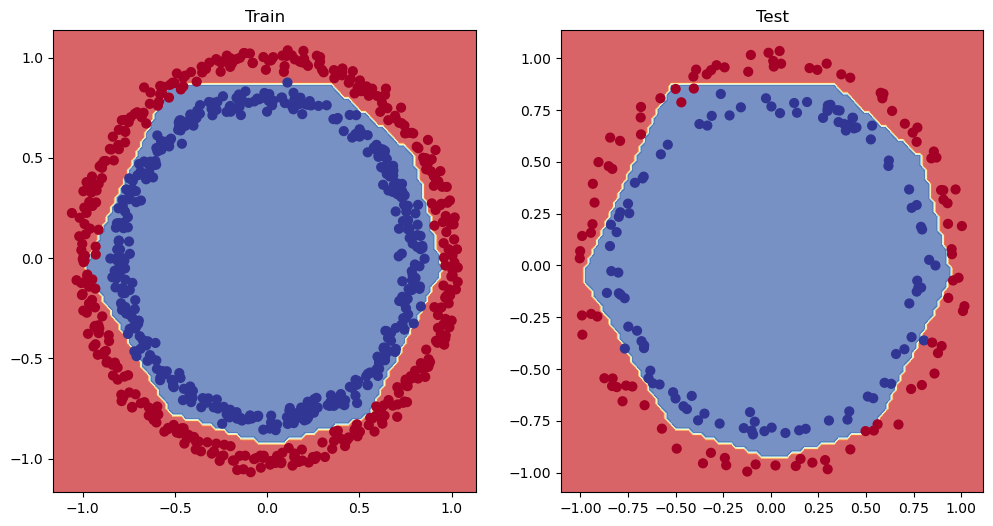

In [8]:
# Import custom plot function
from plot_func import plot_decision_boundary

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plt.show();

**Accuracy**

In [11]:
# check the accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss:.4f}\nModel accuracy on the test set: {accuracy*100:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9700
Model loss on the test set: 0.0955
Model accuracy on the test set: 97.00%


**Confusion Matrix**
- **True positve:** model predicts 1 when truth is 1.
- **True negative:** model predicts 0 when truth is 0.
- **False positive:** model predicts 1 when truth is 0.
- **False negative:** model predicts 0 when truth is 1.

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
# Make predictions
y_preds = model.predict(X_test)

# Create confusion metrics
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [15]:
y_preds[:10]

array([[0.9992172 ],
       [0.03274937],
       [0.98319566],
       [0.02613622],
       [0.98485243],
       [0.8350645 ],
       [0.02872367],
       [0.00300394],
       [0.9477378 ],
       [0.01901659]], dtype=float32)

In [16]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

> Ooops! Looks like our predictions array has come out in **prediction probability** form. The standard output from the sigmoid (or softmax) activations functions.

In [17]:
# Convert prediction probability to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [18]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 2, 98]], dtype=int64)

**Prettify the confusion matrix**

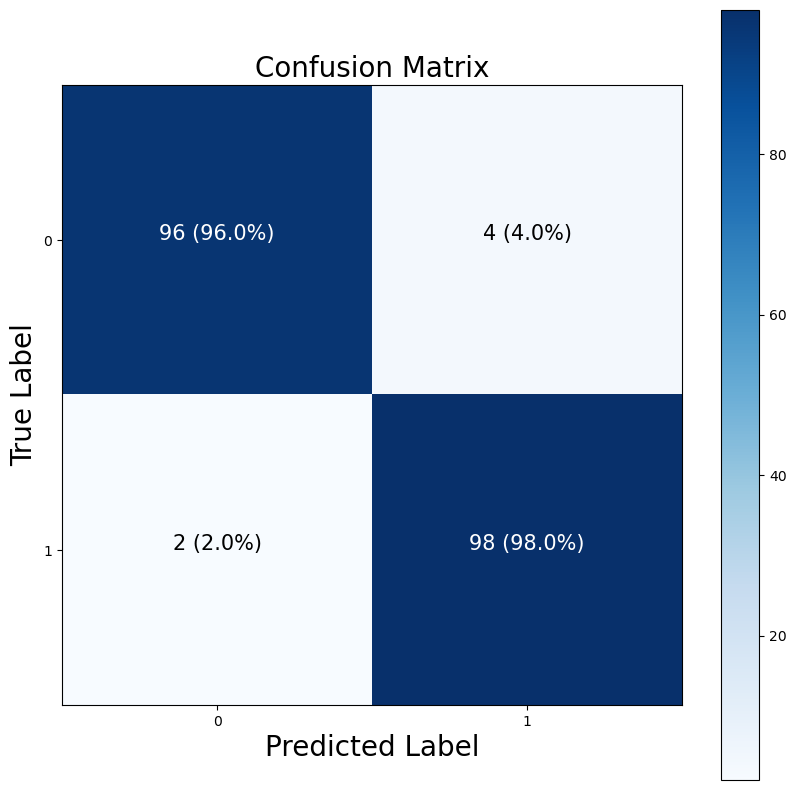

In [30]:
import itertools
import numpy as np

figsize = (10, 10)


# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axis
ax.set(title="Confusion Matrix", 
       xlabel="Predicted Label", 
       ylabel="True Label", 
       xticks= np.arange(n_classes), 
       yticks = np.arange(n_classes),
       xticklabels = labels, yticklabels=labels)

# Set x-axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
             horizontalalignment="center", 
             color="white" if cm[i, j] > threshold else "black", size=15 )

## Multi Class Classification. Click <a href="./04 - Multiclass Classification.ipynb">here</a>